## Kalman Filtering


In [1]:
import Simulator
import Observation
import Statistics

### Definition of forward model

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators



In [2]:
grid = Simulator.Grid(nx=30,ny=20,dx=0.1,dy=0.1)
simulator = Simulator.Simulator(grid, D=0.25, v=[1,0])

### Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
import numpy as np
from random import random

def prior(grid, phi):
    """
    Constructing a Matern-type covariance prior with Matern-parameter phi
    where the matrix is normalized with the standard deviation
    """
    # INPUT! Bell mean
    mean = 0.5*np.ones(grid.N_x)
    # INPUT! Constant var
    var  = 0.5*np.ones(grid.N_x)

    # Matern covariance
    dist_mat = np.copy(grid.dist_mat)
    cov = (1+phi*dist_mat)*np.exp(-phi*dist_mat) 
    # Normalisation
    for i in range(grid.N_x):
        for j in range(grid.N_x):
            cov[i][j] = np.sqrt(var[i])*np.sqrt(var[j])*cov[i][j]
    
    return mean, cov

Please remember to set priors!


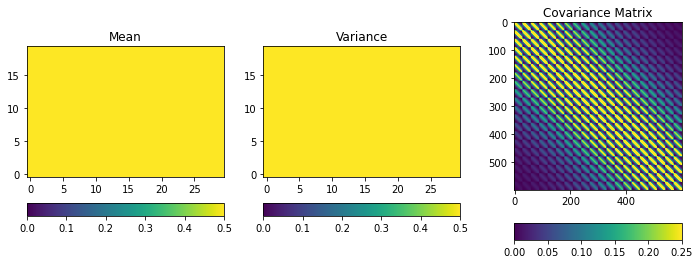

In [4]:
statistics = Statistics.Statistics(simulator, 50)
mean, cov = prior(grid=grid, phi=3.0)
statistics.set(mean, cov)
statistics.plot()

### Setting observation moorings

In [5]:
import numpy as np

def observation_positions(grid, freq=10):
    poses = []
    for j in range(int(np.floor(grid.ny/freq))):
        for i in range(int(np.floor(grid.nx/freq))):
            poses.append([i*freq,j*freq])
    return poses


In [6]:
observation = Observation.Observation(simulator)

Remember to set observation positions and to set values!


In [7]:
poses = observation_positions(grid, freq=10)
observation.set_positions([[0,0]])

In [8]:
observation.obses= np.array([0])

### Temporal evolution of model

In [9]:
statistics.propagate(25)

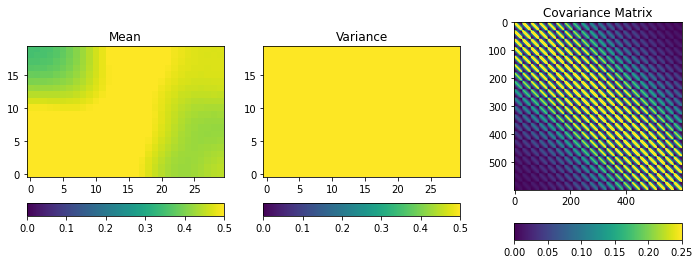

In [11]:
statistics.mean.shape
statistics.plot()